# Imports

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import matplotlib.pyplot as plt

# Format data

In [14]:
all_data_df = pd.DataFrame()
for file in glob.glob("data/behavior/*.csv"):
    all_data_df = pd.concat([all_data_df, pd.read_csv(file)])

all_data_df.head()


,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,...,brainstorm_rand_scripted_face_syntax.2.player.video_conf_quality,brainstorm_rand_scripted_face_syntax.2.player.final_quality,brainstorm_rand_scripted_face_syntax.2.player.final_quality_comment,brainstorm_rand_scripted_face_syntax.2.player.final_conversation_fidelity,brainstorm_rand_scripted_face_syntax.2.player.final_conversation_fidelity_comment,brainstorm_rand_scripted_face_syntax.2.player.final_xp_goal,brainstorm_rand_scripted_face_syntax.2.player.final_manipulation,brainstorm_rand_scripted_face_syntax.2.player.final_manipulation_comment,brainstorm_rand_scripted_face_syntax.2.group.id_in_subsession,brainstorm_rand_scripted_face_syntax.2.subsession.round_number
0,1.0,g63j3xz2,P01,0.0,40.0,40.0,meeting_visual_smile_N8,MeetingProlificCompensation,2024-01-12 15:26:54.809394,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1qd6z632,P02,0.0,40.0,40.0,meeting_visual_smile_N8,MeetingProlificCompensation,2024-01-12 15:26:55.455024,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,wyge7m4h,P03,0.0,40.0,40.0,meeting_visual_smile_N8,MeetingProlificCompensation,2024-01-12 15:26:55.286119,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,uwru0s5g,P04,0.0,40.0,40.0,meeting_visual_smile_N8,MeetingProlificCompensation,2024-01-12 15:26:54.974412,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,40prih1d,P05,0.0,40.0,40.0,meeting_visual_smile_N8,MeetingProlificCompensation,2024-01-12 15:26:54.702375,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# These participants did not participate
all_data_df = all_data_df.loc[all_data_df["participant.code"] != "781g0q9f"]
all_data_df = all_data_df.loc[all_data_df["participant.code"] != "6q1c78lv"]

In [16]:
clean_df = pd.DataFrame()
for i in range(1, 5):

    col_tag = "meeting_visual_smile_N8."+str(i)+".player."
    filter_col = [col for col in all_data_df if col.startswith(col_tag)]
    
    aux_df = all_data_df[filter_col].copy()
    for name in aux_df.columns:
        aux_df = aux_df.rename({name : name.replace(col_tag, "")}, axis=1)

    aux_df["round"] = [i for x in range(len(aux_df))]
    clean_df = pd.concat([clean_df, aux_df], axis=0)

all_data_df = clean_df
all_data_df.head()

,id_in_group,role,payoff,sid,num_rounds,user_id,other_id,other_id_in_group,dyad,primary,...,final_quality_comment,final_conversation_fidelity,final_conversation_fidelity_comment,final_xp_goal,final_manipulation,final_manipulation_comment,second_date,prolific_id,share_prolific_id,round
0,1.0,NaN,0.0,mk:prolific_participant_real_2:1,4.0,p1,p5,2.0,p1p5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,1
1,1.0,NaN,0.0,mk:prolific_participant_real_2:1,4.0,p2,p6,2.0,p2p6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,1
2,1.0,NaN,0.0,mk:prolific_participant_real_2:1,4.0,p3,p7,2.0,p3p7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,1
3,1.0,NaN,0.0,mk:prolific_participant_real_2:1,4.0,p4,p8,2.0,p4p8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,1
4,2.0,NaN,0.0,mk:prolific_participant_real_2:1,4.0,p5,p1,1.0,p1p5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,1


In [17]:
#Add unique identifier
all_data_df["user_id"] = all_data_df["sid"] + all_data_df["user_id"].copy()
all_data_df["other_id"] = all_data_df["sid"] + all_data_df["other_id"].copy()

#Remove outliers
all_data_df = all_data_df.loc[all_data_df["sid"] != "mk:real_meeting_experiment_prolific:1"]
all_data_df = all_data_df.loc[all_data_df["sid"] != "mk:real_meeting_experiment_prolific:3"]


In [18]:
np.unique(all_data_df["sid"].dropna().values)

array(['mk:prolific_participant_real_2:1',
       'mk:prolific_participant_real_2:2',
       'mk:prolific_participant_real_3:1',
       'mk:prolific_participant_real_3:2',
       'mk:real_meeting_experiment_prolific:2',
       'mk:real_meeting_experiment_prolific:4',
       'mk:real_meeting_experiment_prolific:5',
       'mk:real_meeting_experiment_prolific:6'], dtype=object)

# Check Data completness

In [19]:
all_data_df.groupby(["sid", "dyad"]).count()[["user_id"]]

user_id
sid                                   dyad         
mk:prolific_participant_real_2:1      p1p5        2
                                      p1p6        2
                                      p1p7        2
                                      p1p8        2
                                      p2p5        2
...                                             ...
mk:real_meeting_experiment_prolific:6 p3p8        2
                                      p4p5        2
                                      p4p6        2
                                      p4p7        2
                                      p4p8        2

[127 rows x 1 columns]

In [20]:
all_data_df.groupby(["sid", "dyad", "user_id", "other_id","participant_condition", "other_condition"]).count()[["other_liked"]]

other_liked
sid                                   dyad user_id                                 other_id                                participant_condition other_condition             
mk:prolific_participant_real_2:1      p1p5 mk:prolific_participant_real_2:1p1      mk:prolific_participant_real_2:1p5      U                     U                          1
                                           mk:prolific_participant_real_2:1p5      mk:prolific_participant_real_2:1p1      U                     U                          1
                                      p1p6 mk:prolific_participant_real_2:1p1      mk:prolific_participant_real_2:1p6      S                     U                          1
                                           mk:prolific_participant_real_2:1p6      mk:prolific_participant_real_2:1p1      U                     S                          1
                                      p1p7 mk:prolific_participant_real_2:1p1      mk:prolific_participant_real_2:1p7      S                     S                          1
...                                                                                                                                                                       ...
mk:real_meeting_experiment_prolific:6 p4p6 mk:real_meeting_experiment_prolific:6p6 mk:real_meeting_experiment_prolific:6p4 U                     U                          1
                                      p4p7 mk:real_meeting_experiment_prolific:6p4 mk:real_meeting_experiment_prolific:6p7 U                     S                          1
                                           mk:real_meeting_experiment_prolific:6p7 mk:real_meeting_experiment_prolific:6p4 S                     U                          1
                                      p4p8 mk:real_meeting_experiment_prolific:6p4 mk:real_meeting_experiment_prolific:6p8 S                     S                          1
                                           mk:real_meeting_experiment_prolific:6p8 mk:real_meeting_experiment_prolific:6p4 S                     S                          1

[248 rows x 1 columns]

In [21]:
df_analysis = all_data_df.groupby(["sid", "user_id", "dyad", "other_id","participant_condition", "other_condition"]).mean().reset_index()
df_analysis.groupby(["sid", "user_id"]).count()[["dyad"]]

df_analysis

/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/802642567.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analysis = all_data_df.groupby(["sid", "user_id", "dyad", "other_id","participant_condition", "other_condition"]).mean().reset_index()


,sid,user_id,dyad,other_id,participant_condition,other_condition,id_in_group,role,payoff,num_rounds,...,participant_video,other_video,liked,other_liked,conversation_quality,video_conf_quality,final_quality,final_conversation_fidelity,final_manipulation,round
0,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p5,mk:prolific_participant_real_2:1p5,U,U,1.0,NaN,0.0,4.0,...,NaN,NaN,4.0,4.0,5.0,7.0,NaN,NaN,NaN,1.0
1,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p6,mk:prolific_participant_real_2:1p6,S,U,1.0,NaN,0.0,4.0,...,NaN,NaN,1.0,1.0,1.0,4.0,NaN,NaN,NaN,3.0
2,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p7,mk:prolific_participant_real_2:1p7,S,S,1.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,3.0,6.0,5.0,4.0,4.0
3,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p8,mk:prolific_participant_real_2:1p8,U,S,1.0,NaN,0.0,4.0,...,NaN,NaN,5.0,5.0,6.0,7.0,NaN,NaN,NaN,2.0
4,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p2,p2p5,mk:prolific_participant_real_2:1p5,S,S,1.0,NaN,0.0,4.0,...,NaN,NaN,7.0,6.0,7.0,7.0,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p7,p4p7,mk:real_meeting_experiment_prolific:6p4,S,U,2.0,NaN,0.0,4.0,...,NaN,NaN,4.0,6.0,4.0,7.0,NaN,NaN,NaN,3.0
244,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p8,p1p8,mk:real_meeting_experiment_prolific:6p1,S,U,2.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,7.0,NaN,NaN,NaN,2.0
245,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p8,p2p8,mk:real_meeting_experiment_prolific:6p2,U,S,2.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,7.0,7.0,7.0,1.0,4.0
246,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p8,p3p8,mk:real_meeting_experiment_prolific:6p3,U,U,2.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,7.0,NaN,NaN,NaN,3.0


In [22]:
df_analysis

,sid,user_id,dyad,other_id,participant_condition,other_condition,id_in_group,role,payoff,num_rounds,...,participant_video,other_video,liked,other_liked,conversation_quality,video_conf_quality,final_quality,final_conversation_fidelity,final_manipulation,round
0,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p5,mk:prolific_participant_real_2:1p5,U,U,1.0,NaN,0.0,4.0,...,NaN,NaN,4.0,4.0,5.0,7.0,NaN,NaN,NaN,1.0
1,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p6,mk:prolific_participant_real_2:1p6,S,U,1.0,NaN,0.0,4.0,...,NaN,NaN,1.0,1.0,1.0,4.0,NaN,NaN,NaN,3.0
2,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p7,mk:prolific_participant_real_2:1p7,S,S,1.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,3.0,6.0,5.0,4.0,4.0
3,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p1,p1p8,mk:prolific_participant_real_2:1p8,U,S,1.0,NaN,0.0,4.0,...,NaN,NaN,5.0,5.0,6.0,7.0,NaN,NaN,NaN,2.0
4,mk:prolific_participant_real_2:1,mk:prolific_participant_real_2:1p2,p2p5,mk:prolific_participant_real_2:1p5,S,S,1.0,NaN,0.0,4.0,...,NaN,NaN,7.0,6.0,7.0,7.0,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p7,p4p7,mk:real_meeting_experiment_prolific:6p4,S,U,2.0,NaN,0.0,4.0,...,NaN,NaN,4.0,6.0,4.0,7.0,NaN,NaN,NaN,3.0
244,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p8,p1p8,mk:real_meeting_experiment_prolific:6p1,S,U,2.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,7.0,NaN,NaN,NaN,2.0
245,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p8,p2p8,mk:real_meeting_experiment_prolific:6p2,U,S,2.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,7.0,7.0,7.0,1.0,4.0
246,mk:real_meeting_experiment_prolific:6,mk:real_meeting_experiment_prolific:6p8,p3p8,mk:real_meeting_experiment_prolific:6p3,U,U,2.0,NaN,0.0,4.0,...,NaN,NaN,7.0,7.0,7.0,7.0,NaN,NaN,NaN,3.0


In [23]:
print("number of dyads : " + str(len(all_data_df.groupby(["sid", "dyad"]).mean())))

number of dyads : 127


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/2670973482.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("number of dyads : " + str(len(all_data_df.groupby(["sid", "dyad"]).mean())))


In [24]:
print("number of participants : " + str(len(all_data_df.groupby(["sid", "user_id"]).mean())))

number of dyads : 62


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/1351703891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("number of dyads : " + str(len(all_data_df.groupby(["sid", "user_id"]).mean())))


In [25]:
print("number of sessions : " + str(len(all_data_df.groupby(["sid"]).mean())))

number of sessions : 8


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/3683827142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("number of sessions : " + str(len(all_data_df.groupby(["sid"]).mean())))


In [26]:
print("number of dyads : " + str(len(all_data_df.groupby(["sid", "dyad"]).mean())))

number of interactions : 127


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/59795097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("number of interactions : " + str(len(all_data_df.groupby(["sid", "dyad"]).mean())))


# Behavior analysis

In [32]:
df_analysis = all_data_df.set_index(["sid", "dyad", "user_id", "participant_condition", "other_condition"]).sort_index()
df_analysis = df_analysis[['liked', 'other_liked', 'conversation_quality', 'video_conf_quality']]

len_trials_before = len(df_analysis.groupby(["sid", "dyad", "user_id", "participant_condition", "other_condition"]).mean())/2
print(len_trials_before)
df_analysis = df_analysis.loc[df_analysis["video_conf_quality"] > 2]
len_trials_after = len(df_analysis.groupby(["sid", "dyad", "user_id", "participant_condition", "other_condition"]).mean())/2
print(len_trials_after)
print("number of dyads : " + str(len(df_analysis.groupby(["sid", "dyad"]).mean())))

124.0
100.5
number of dyads : 109


In [27]:
#behavior columns : 'liked', 'other_liked', 'conversation_quality', 'video_conf_quality', 'second_date'

df_analysis = all_data_df.set_index(["sid", "dyad", "user_id", "participant_condition", "other_condition"]).sort_index()
df_analysis = df_analysis[['liked', 'other_liked', 'conversation_quality', 'video_conf_quality']]
print(len(df_analysis))
df_analysis = df_analysis.loc[df_analysis["video_conf_quality"] > 2]
df_analysis = df_analysis.stack().to_frame("measure").reset_index()
df_analysis = df_analysis.rename({"level_5" : "question_content"}, axis=1).reset_index()

df_analysis.head()
print(len(df_analysis))

3464
804


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_84958/2445180013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analysis = df_analysis.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean().reset_index()


Number of participants : 58


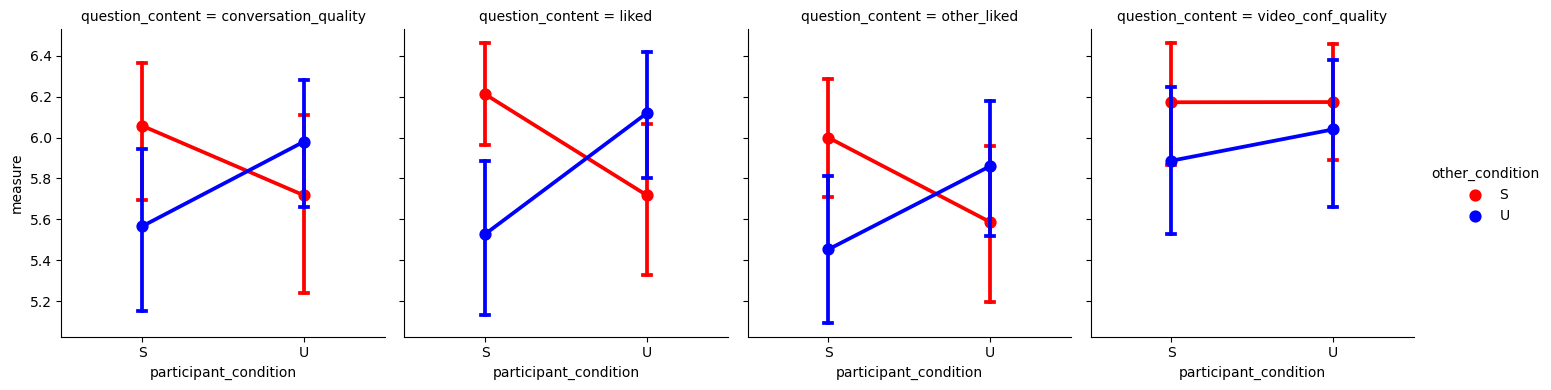

In [13]:
df_analysis = df_analysis.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean().reset_index()
print("Number of participants : " + str(len(np.unique(df_analysis["user_id"]))))

sns.catplot(x="participant_condition", y="measure", col="question_content", units="user_id", hue="other_condition"
            , height=4, aspect=0.9, data=df_analysis
            , kind="point", capsize=.05
            , order= ["S", "U"]
            , palette=sns.color_palette(['red', 'blue'])
           )

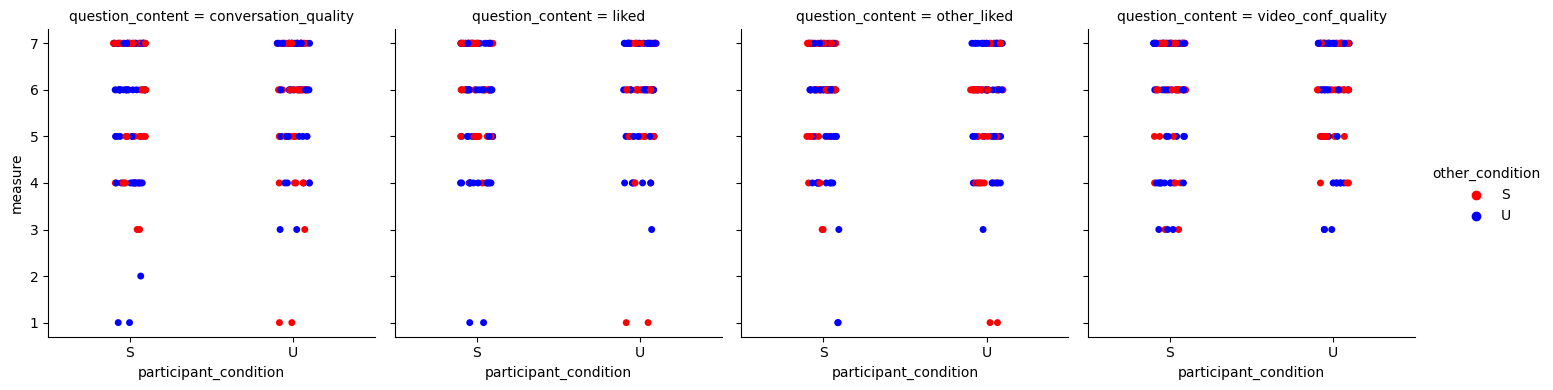

In [14]:
df_analysis = df_analysis.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean().reset_index()


sns.catplot(x="participant_condition", y="measure", col="question_content", units="user_id", hue="other_condition"
            , height=4, aspect=0.9, data=df_analysis
            , order= ["S", "U"]
            , palette=sns.color_palette(['red', 'blue'])
           )

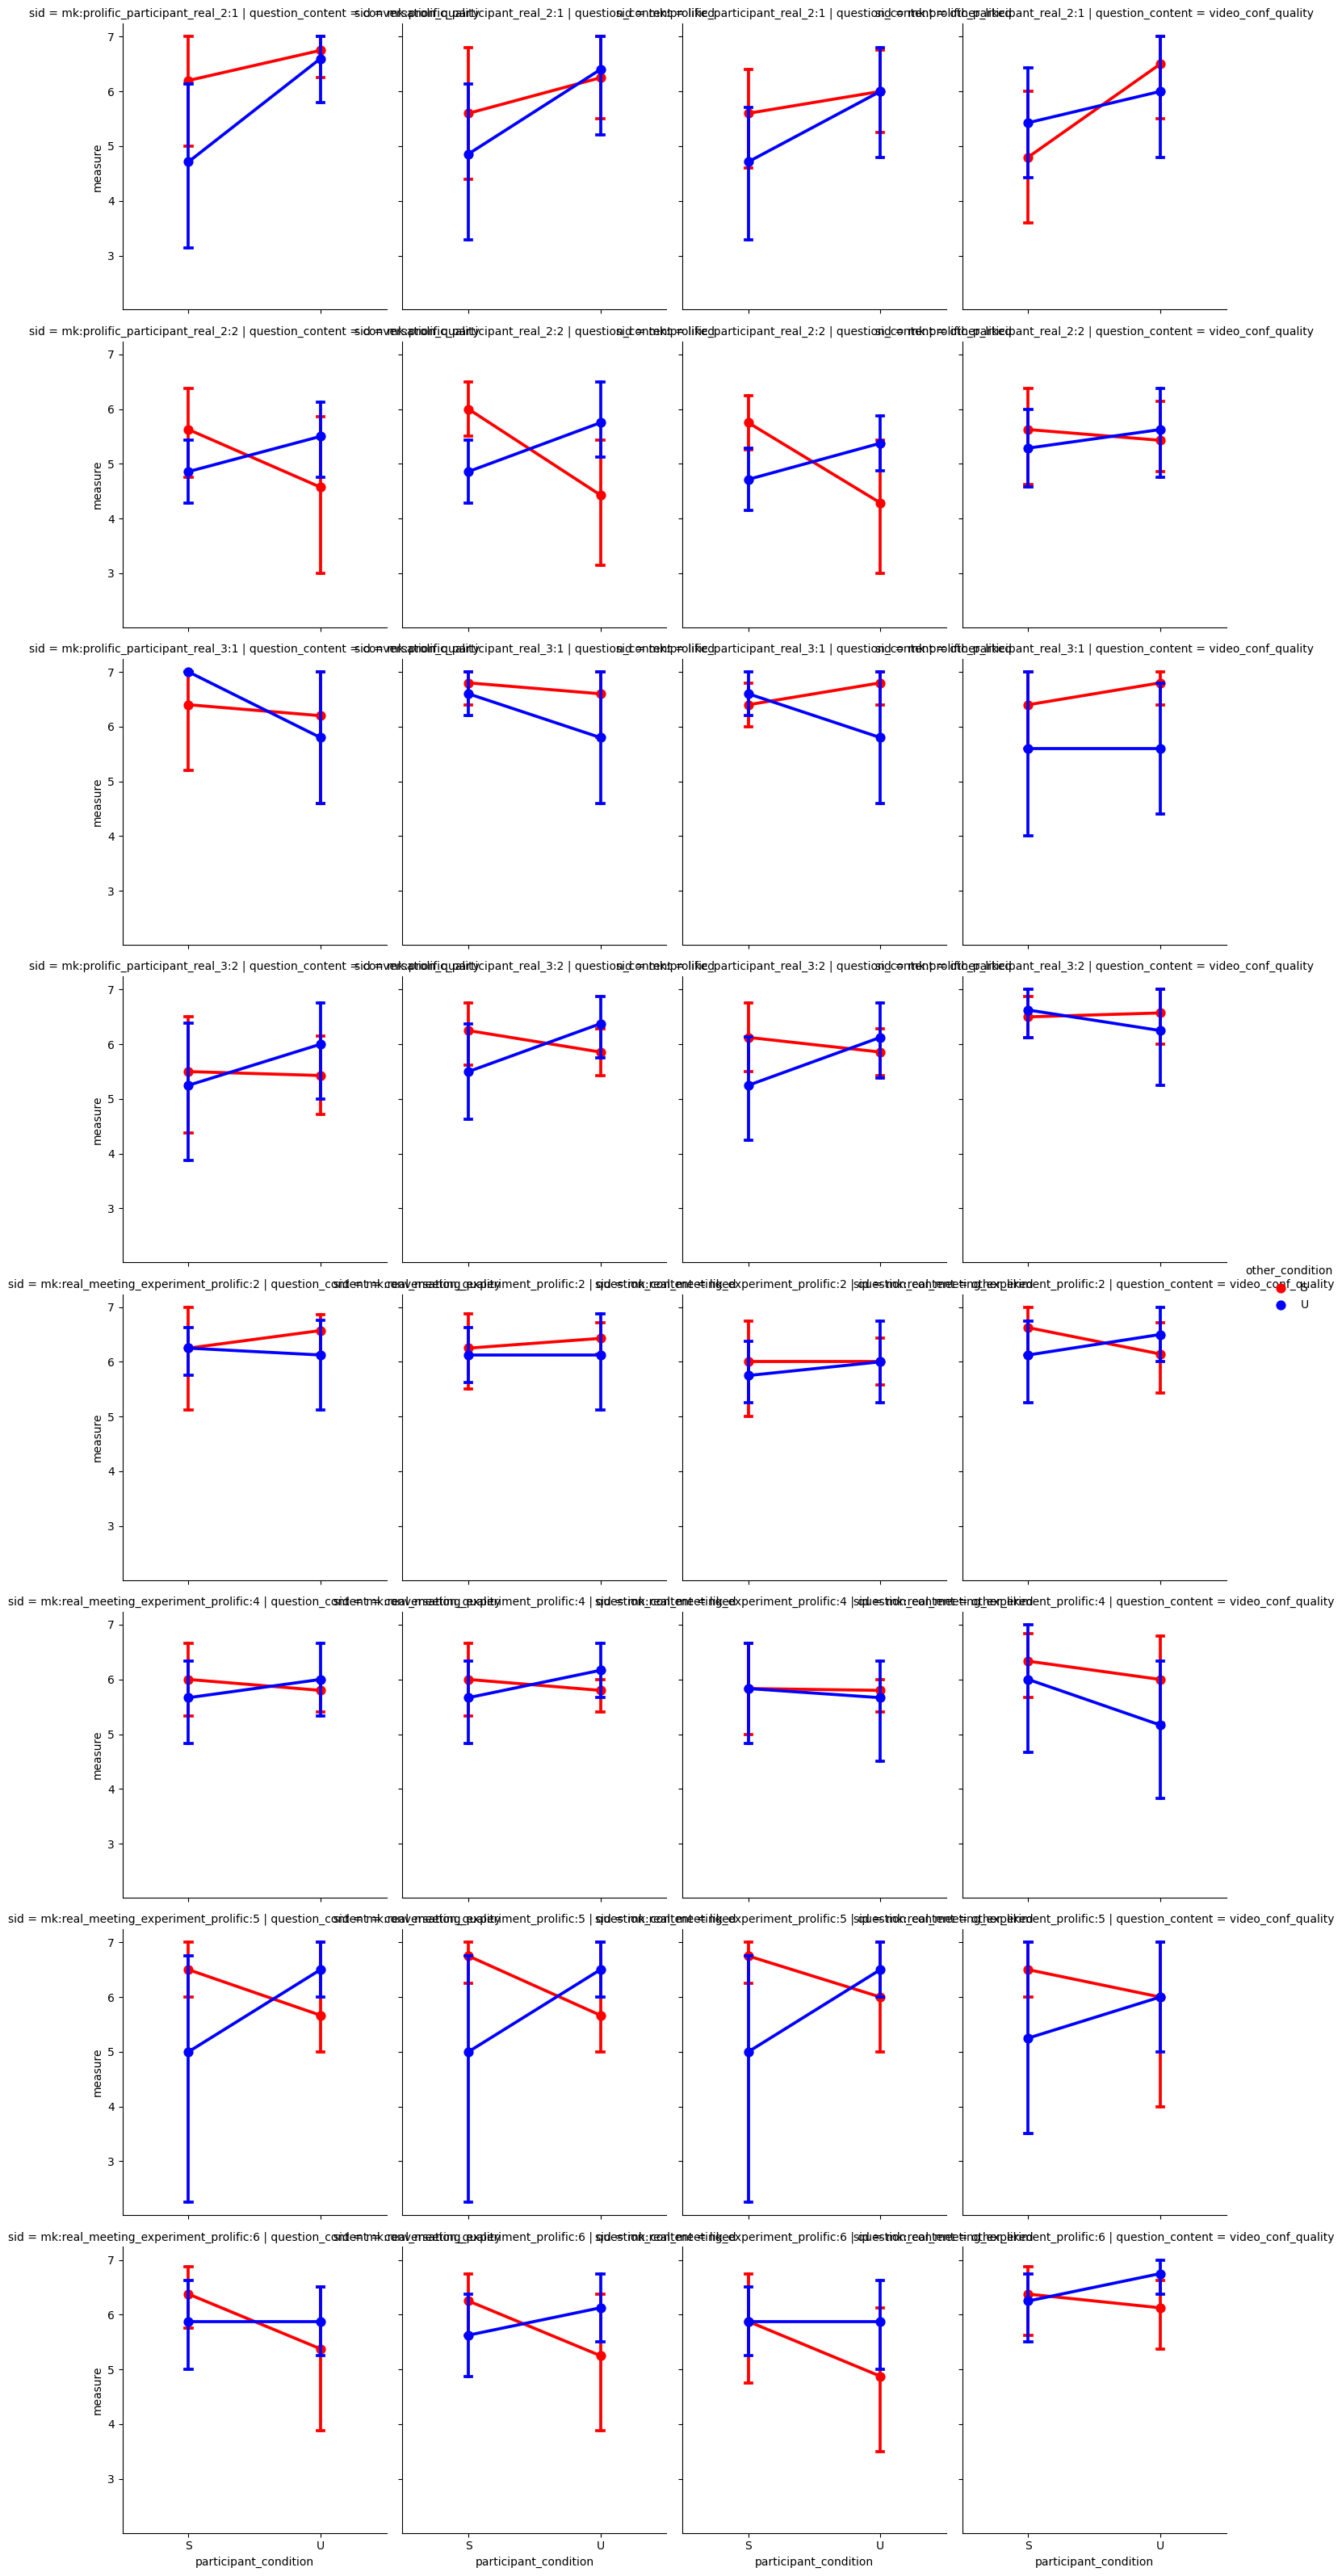

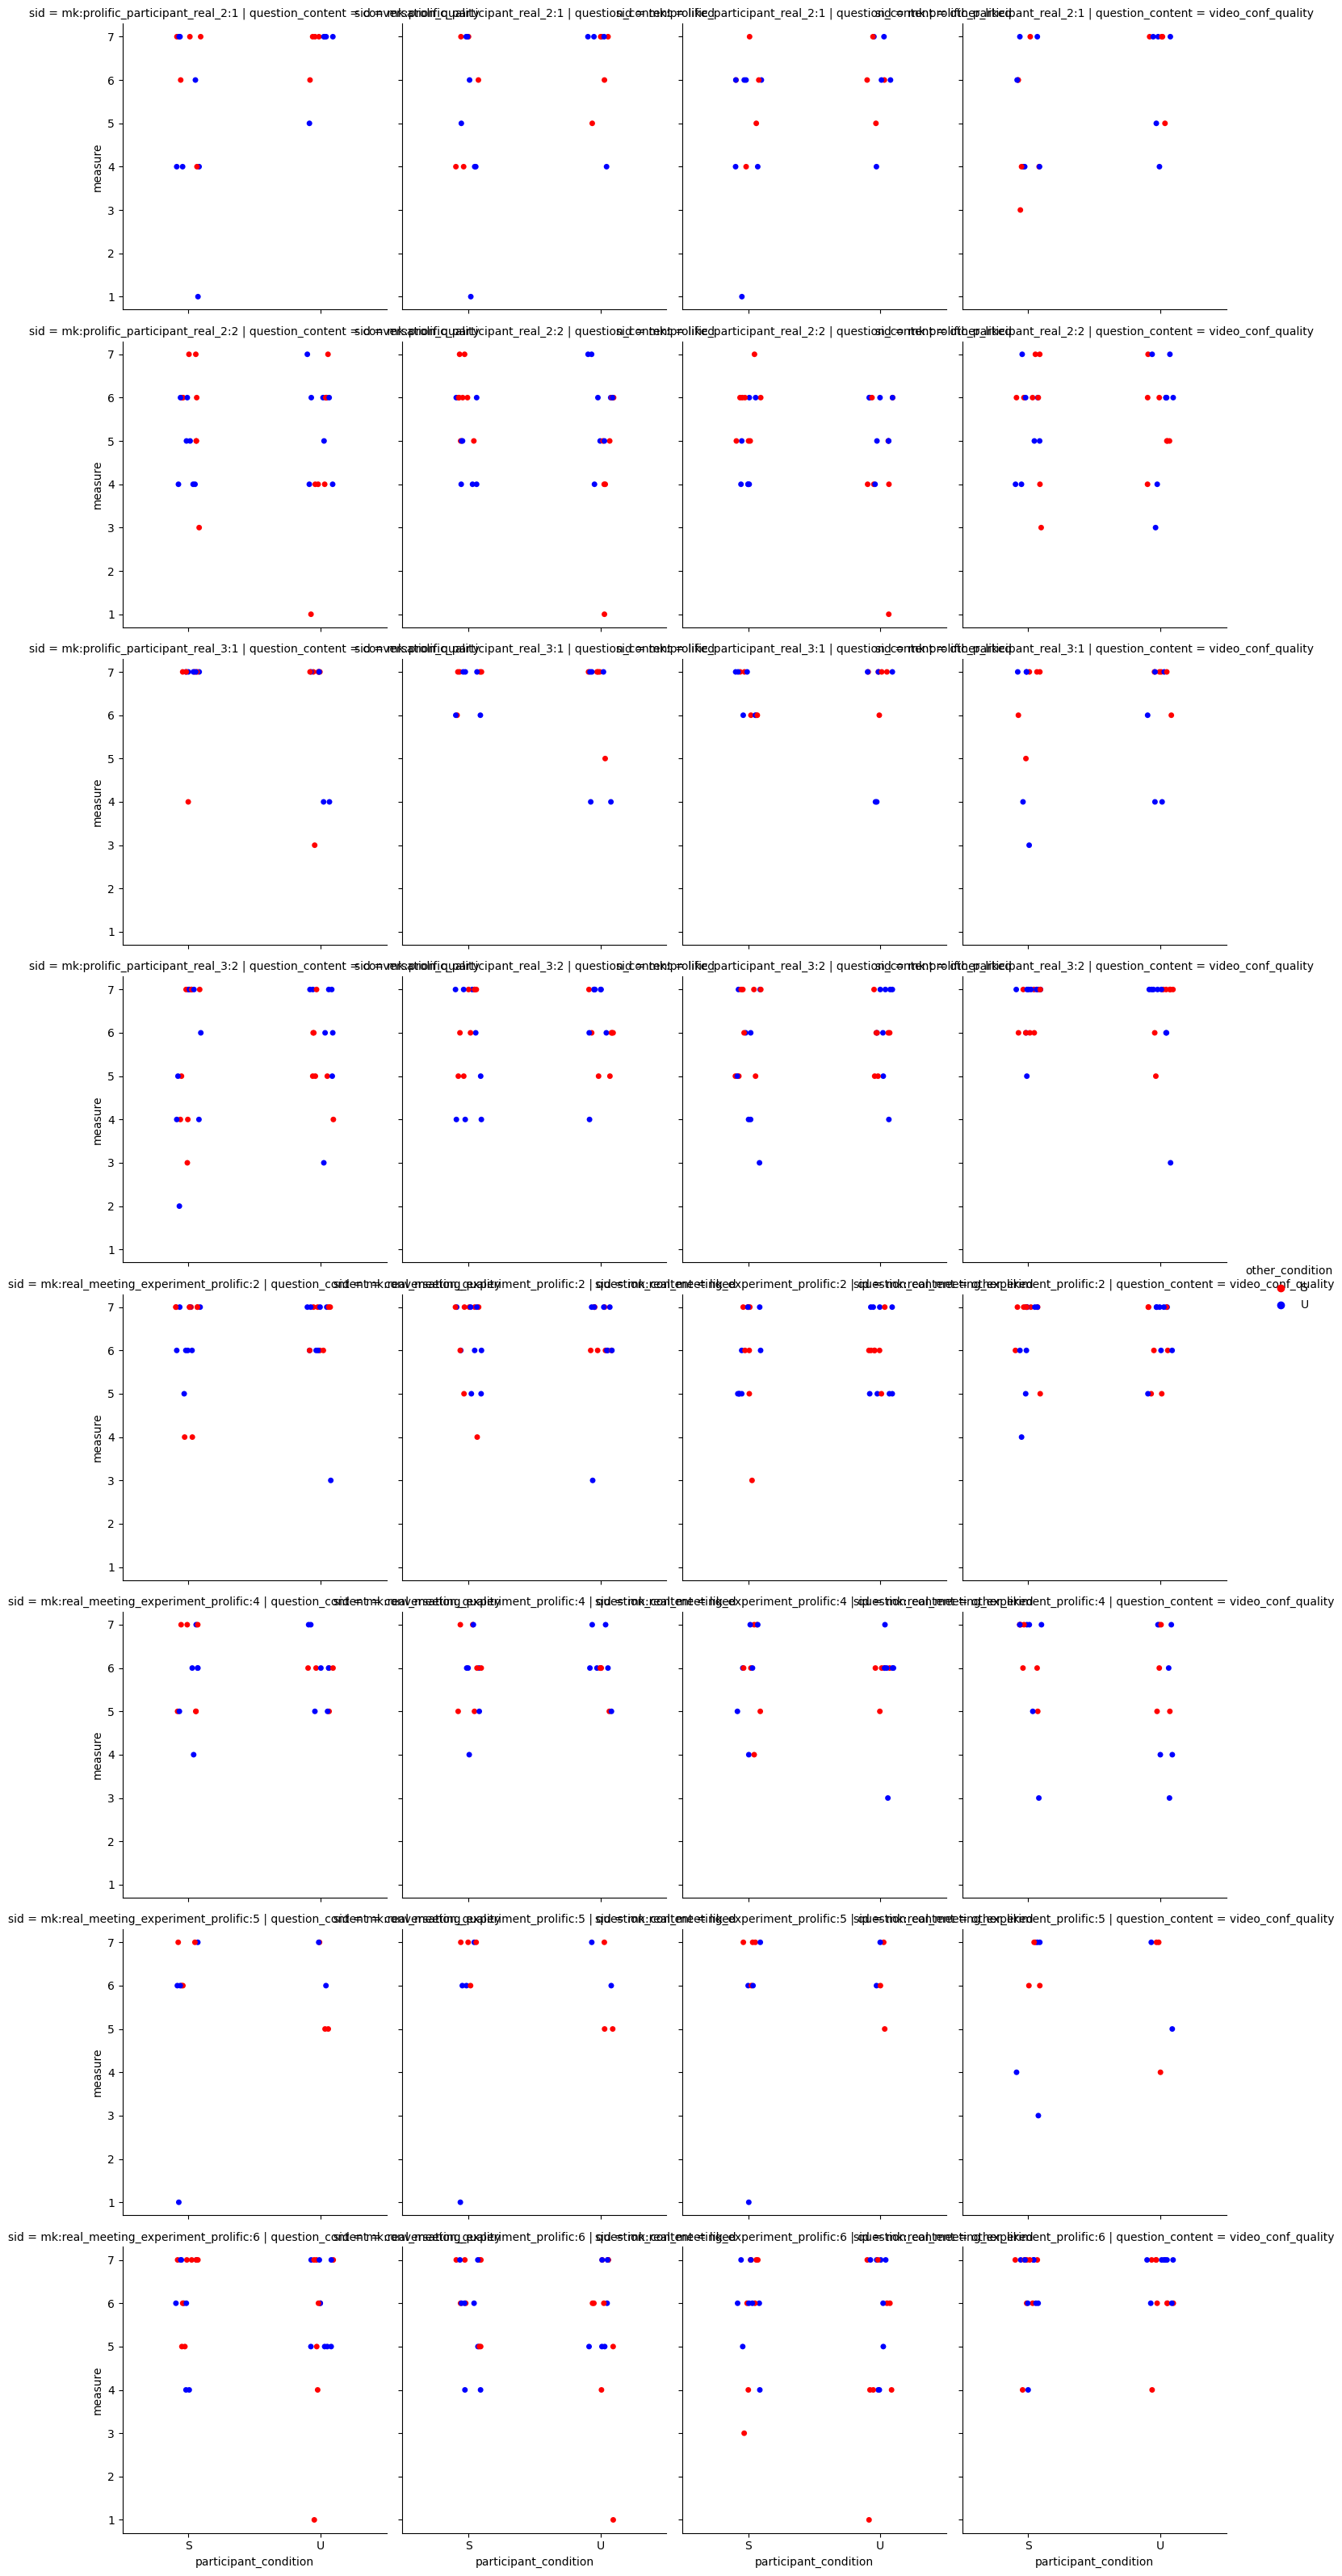

In [15]:
df_analysis = df_analysis.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean().reset_index()
df_analysis["u_id"] = df_analysis["sid"] + df_analysis["user_id"]

sns.catplot(x="participant_condition", y="measure", col="question_content", units="user_id", hue="other_condition"
            , height=4, aspect=0.9, data=df_analysis
            , kind="point", capsize=.05
            , row = "sid"
            , order= ["S", "U"]
            , palette=sns.color_palette(['red', 'blue'])
           )

sns.catplot(x="participant_condition", y="measure", col="question_content", units="user_id", hue="other_condition"
            , height=4, aspect=0.9, data=df_analysis
            , row = "sid"
            , order= ["S", "U"]
            , palette=sns.color_palette(['red', 'blue'])
           )

In [26]:
#Export for GLMM
#behavior columns : 'liked', 'other_liked', 'conversation_quality', 'video_conf_quality', 'second_date'

df_analysis = all_data_df.set_index(["sid", "dyad", "user_id", "other_id", "participant_condition", "other_condition"]).sort_index()
df_analysis = df_analysis[['liked', 'other_liked', 'conversation_quality', 'video_conf_quality']]
df_analysis = df_analysis.loc[df_analysis["video_conf_quality"] > 2] #Exclude communications that didn't go well.
df_analysis = df_analysis.stack().to_frame("measure").reset_index()
df_analysis = df_analysis.rename({"level_6" : "question_content"}, axis=1).reset_index()


df_analysis.head()

df_analysis.to_csv("data/behavior/all_data_df.csv")

# SRM data

In [4]:
from conversions import get_file_without_path

srm_df = pd.DataFrame()
for file in glob.glob("data/behavior/srm/*.csv"):
    df = pd.read_csv(file)
    df = df.dropna()
    file_tag = get_file_without_path(file)
    df["question_content"] = [file_tag for x in range(len(df))]
    srm_df = pd.concat([srm_df, df])

srm_df = srm_df.rename({"participant_nb": "user_id"}, axis=1)
srm_df = srm_df.rename({"interacting_partner": "other_id"}, axis=1)
srm_df = srm_df.rename({"group.id": "sid"}, axis=1)
srm_df = srm_df.rename({"relationship": "measure"}, axis=1)

In [5]:
df_analysis = all_data_df.groupby(["user_id", "other_id", "participant_condition", "other_condition" ]).mean().reset_index()[["user_id", "other_id", "participant_condition", "other_condition" ]]

srm_df = srm_df.merge(df_analysis, on=["user_id", "other_id"])

/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/3223938136.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analysis = all_data_df.groupby(["user_id", "other_id", "participant_condition", "other_condition" ]).mean().reset_index()[["user_id", "other_id", "participant_condition", "other_condition" ]]


/var/folders/g5/mqbcmmn575z0s3c021r942c80000gp/T/ipykernel_37607/4290043972.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analysis = srm_df.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean().reset_index()


Number of participants : 58


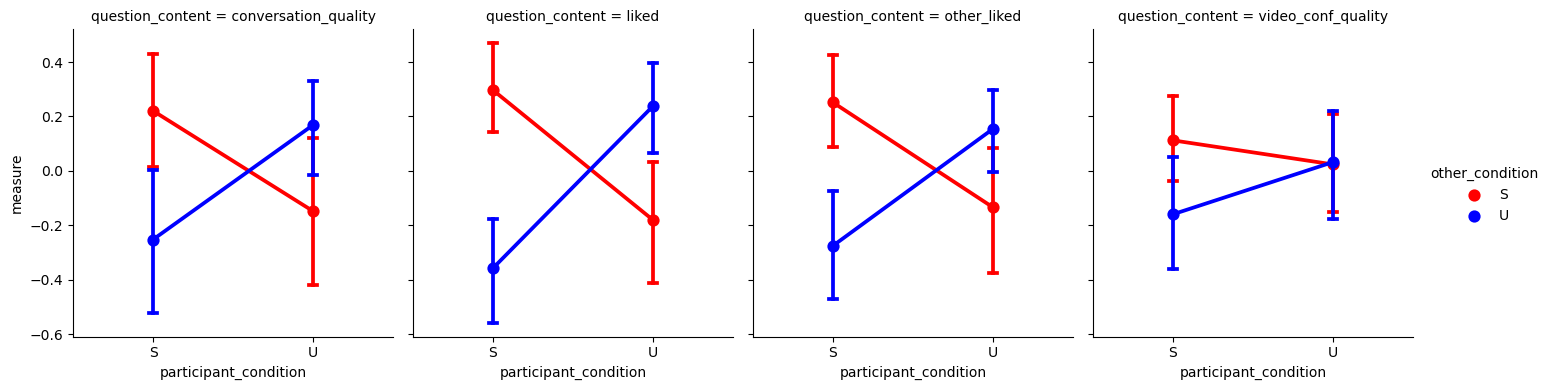

In [9]:
df_analysis = srm_df.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean().reset_index()
print("Number of participants : " + str(len(np.unique(df_analysis["user_id"]))))

sns.catplot(x="participant_condition", y="measure", col="question_content", units="user_id", hue="other_condition"
            , height=4, aspect=0.9, data=df_analysis
            , kind="point", capsize=.05
            , order= ["S", "U"]
            , palette=sns.color_palette(['red', 'blue'])
           )


Number of participants : 58


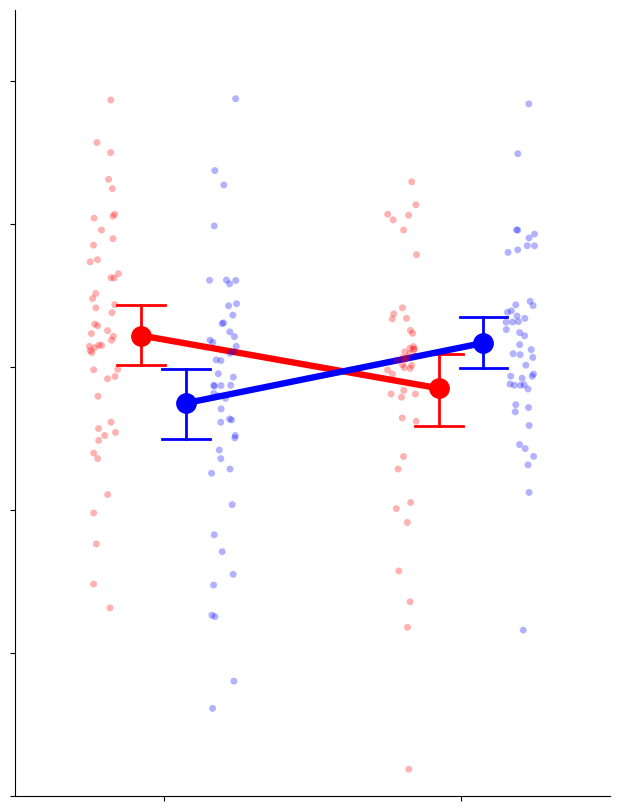

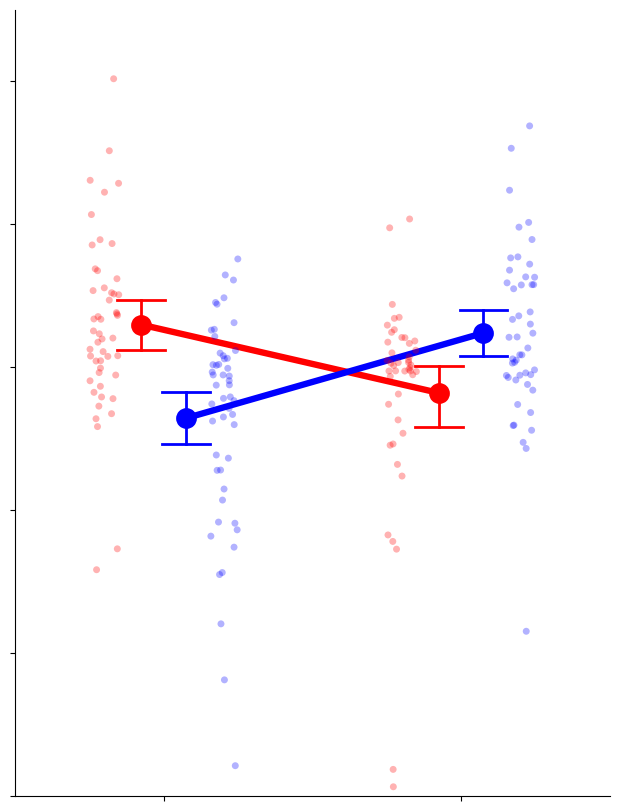

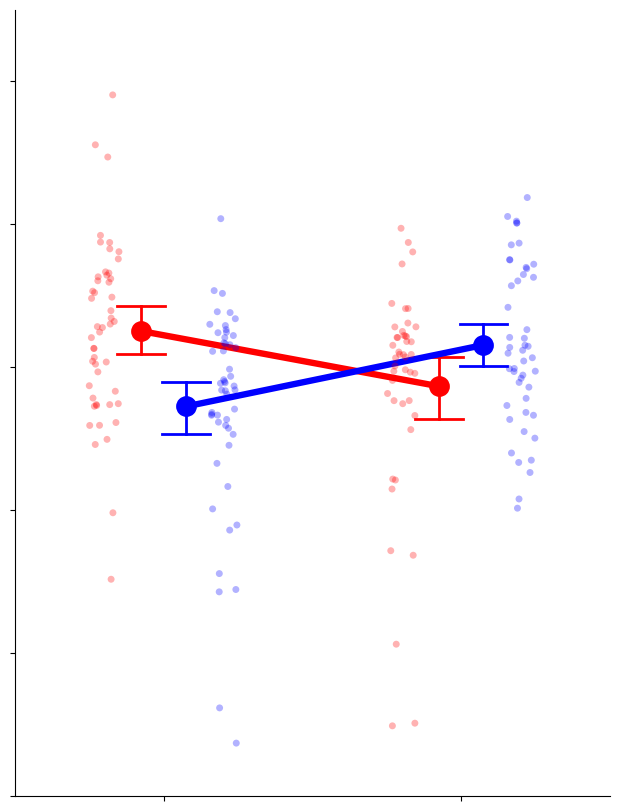

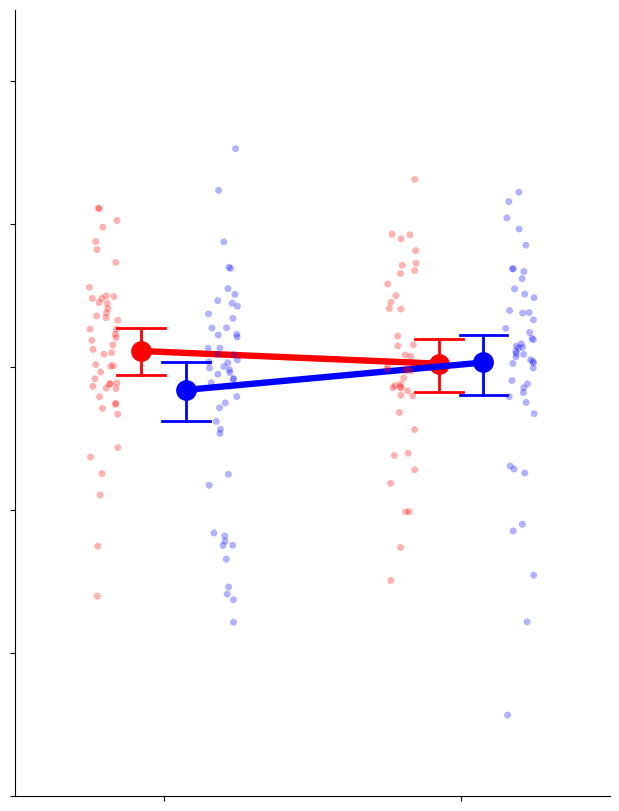

In [7]:
df_analysis = srm_df.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean(numeric_only=True).reset_index()
print("Number of participants : " + str(len(np.unique(df_analysis["user_id"]))))

for question_content in np.unique(df_analysis["question_content"]):
    df_analysis = srm_df.groupby(["sid", "user_id", "participant_condition", "other_condition", "question_content"]).mean(numeric_only=True).reset_index()
    df_analysis = df_analysis.loc[df_analysis["question_content"] == question_content]
    
    g = sns.catplot( x="participant_condition", y="measure", units="user_id"
                        , height=8.6
                        , aspect=0.8
                        , data=df_analysis
                        , kind="point"
                        , capsize=.16
                        , hue="other_condition"
                        , legend=False
                        , scale=1.7
                        , dodge= 0.15
                        , errwidth=2
                        , palette= sns.color_palette(["red", "blue"])
                )
        # Add individual measure points
    sns.stripplot(x="participant_condition", y="measure"
                    , data=df_analysis, hue="other_condition", dodge=0.15, size=5, alpha=0.3, palette=["red", "blue"]
                    , legend=False
                    )    
        
    g.set(ylim=(-3, 2.5))
    
    plt.savefig("plots/"+question_content+"_legend.pdf", bbox_inches='tight')
    g.set(xticklabels=[], yticklabels=[], title='',xlabel=None, ylabel=None)
    plt.savefig("plots/"+question_content+".pdf", bbox_inches='tight')    

In [12]:
#For glmm
df_analysis = srm_df.groupby(["sid", "user_id", "other_id", "participant_condition", "other_condition", "question_content"]).mean(numeric_only=True).reset_index()
df_analysis.to_csv("data/behavior/srm/all_srm.csv")

# Debriefing question

In [81]:
debrief_df = all_data_df[["sid", "user_id", "round", "final_quality", "final_quality_comment", "final_conversation_fidelity", "final_conversation_fidelity_comment", "final_xp_goal", "final_manipulation_comment", "final_manipulation", "final_manipulation_comment", "prolific_id", "share_prolific_id"]]
debrief_df = debrief_df.loc[debrief_df["round"] == 4].drop("round", axis=1)

In [82]:
debrief_df.to_csv("debrief.csv")